# MNIST Dataset CV with TensorFlow

## Import the datset

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### View shape of data

In [2]:
print('Shape of tensor')
print('\ttrain images shape: \t', train_images.shape)
print('\ttrain labels shape: \t', train_labels.shape)
print('\ttest images shape: \t', test_images.shape)
print('\ttest labels shape: \t', test_labels.shape)

Shape of tensor
	train images shape: 	 (60000, 28, 28)
	train labels shape: 	 (60000,)
	test images shape: 	 (10000, 28, 28)
	test labels shape: 	 (10000,)


### View sample images and compare to labels

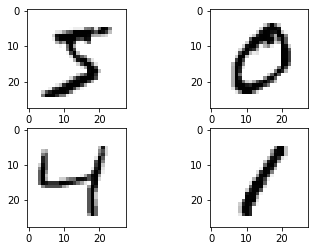

Labels:
	 5
	 0
	 4
	 1


In [3]:
import matplotlib.pyplot as plt

# View first four images
for i in range(4):  
    plt.subplot(221+i)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

# Compare labels to check validity
print('Labels:')
for i in range(4):
    print('\t', train_labels[i])

## Data pre-processing

In [4]:
# Flatten all images with reshape()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Change to floats and scale from [0,1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255



# Change label data to categorical 
from tensorflow.keras.utils import to_categorical

flat_train_labels = to_categorical(train_labels)
flat_test_labels = to_categorical(test_labels)

# Check encoding
print('First test image label was: ', test_labels[0])
print('First test image label is: ', flat_test_labels[0])

First test image label was:  7
First test image label is:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Build the model

In [5]:
from tensorflow.keras import models, layers
model = models.Sequential()
# Add single hidden layer
model.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28, )))
# Add output layer
model.add(layers.Dense(10, activation = 'softmax'))

# Create model optimizer
from tensorflow.keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001, momentum = 0.0),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Train the network

In [6]:
model.fit(train_images, flat_train_labels, epochs=6, batch_size=128)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2563 - accuracy: 0.9252
Epoch 2/6
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1022 - accuracy: 0.9699
Epoch 3/6
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0676 - accuracy: 0.9801
Epoch 4/6
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0493 - accuracy: 0.9853
Epoch 5/6
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0373 - accuracy: 0.9890
Epoch 6/6
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0282 - accuracy: 0.9919


As can be seen from the training, final accuracy after the 6th epoch is 99%. Growth become particularly small after the 4th epoch and could easily be stopped there on a larger dataset if training time/resourses are a concern.

## Evaluate on test set

In [7]:
test_loss, test_acc = model.evaluate(test_images, flat_test_labels)

10000/10000 [==============================] - 1s 95us/sample - loss: 0.0698 - accuracy: 0.9802


Final accuracy on the test set was 98%, showing a very high accuracy at recognizing handwritten letter over the datset.

## Get classification report to see each class accuracy

In [8]:
from sklearn.metrics import classification_report
from numpy import argmax
import numpy as np

In [9]:
# Predict and round predictions to ints
y_hat = model.predict(test_images)
rounded_y_hat = [np.round(x) for x in y_hat]

In [10]:
# View rounding was successful
rounded_y_hat

[array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0

### Results need to have the categorical encoding reversed

In [11]:
# Reverse encoding
rounded_y_hat=np.argmax(rounded_y_hat, axis=1)
rounded_labels=np.argmax(flat_test_labels, axis=1)

In [12]:
# Display results
print(classification_report(rounded_labels, rounded_y_hat))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Individual results of each class are also very high. The lowest accuracy for any indivual class was 94% for it's precision on class 0.

### Save model

In [14]:
model.save("model.h5")